# Average run length versus sigma threshold

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math

In [4]:
def window_detection(signal, λ, hmax=128, spacing='logarithmic'):
    
    if hmax==None:
        hmax=len(signal)
    
    if spacing=='logarithmic':
        window_lengths = 2**(np.arange(0, np.ceil(np.log2(hmax)))).astype(int)
    else:
        window_lengths = np.arange(1, hmax+1)
    
    max_threshold=0
    best_window=1
    
    output=pd.DataFrame()
    
    for h in window_lengths:
        
        data = pd.Series(signal).rolling(window=h).mean()
        μ = data/λ
        
        lr_statistic = 2*h*λ*(μ*np.log(μ)-μ+1) * (μ>1)
        sigma_level = np.sqrt(lr_statistic)
        output[f'{h}'] = sigma_level
    
    max_sigma = output.max(axis='columns')
    
    return max_sigma

In [32]:
sigma_levels = np.linspace(4, 5, 11)
λ = 20
runs = range(50)
size=2000000

data_logarithmic=pd.DataFrame(index=sigma_levels, columns=runs)

for run in runs:
    np.random.seed(run)
    signal = stats.poisson(mu=λ).rvs(size)
    significance = window_detection(signal, λ)
    for sigma_level in sigma_levels:
        run_length = np.argmax(significance>sigma_level)
        if run_length == 0:
            run_length = size
        data_logarithmic.loc[sigma_level, run] = run_length

data_logarithmic["average"] = data_logarithmic.mean(axis="columns")

data_all=pd.DataFrame(index=sigma_levels, columns=runs)
for run in runs:
    np.random.seed(run)
    signal = stats.poisson(mu=λ).rvs(size)
    significance = window_detection(signal, λ, spacing="all")
    for sigma_level in sigma_levels:
        run_length = np.argmax(significance>sigma_level)
        if run_length == 0:
            run_length = size
        data_all.loc[sigma_level, run] = run_length

data_all["average"] = data_all.mean(axis="columns")

C:\Users\wardk3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [33]:
data_all

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,average
4.0,8311,579,840,19666,1093,2046,1249,2375,7171,1380,...,387,4167,13275,5066,3562,118,87,890,5547,5623.34
4.1,8312,579,840,19666,1093,2046,1249,20074,7171,15151,...,387,4836,13275,9073,3562,916,87,890,16020,8449.74
4.2,8312,8828,840,22274,1094,2046,1249,30472,7171,15152,...,387,4836,16392,9076,64486,916,6640,890,35401,12277.34
4.3,8312,8830,840,22274,1094,2046,1249,30472,22471,15152,...,388,4836,16392,9076,64486,27374,6640,23486,58641,18940.88
4.4,8312,36231,840,87652,1094,2046,44118,30472,22471,15152,...,388,38653,16392,9076,74361,27375,12110,23488,58641,24567.46
4.5,8314,36231,840,153170,1094,116956,101264,41927,22471,67782,...,388,38727,16392,9076,210696,27375,12110,23488,58650,48482.06
4.6,204187,36231,841,235299,1095,279364,101264,41927,93470,87965,...,388,38731,16392,9076,210696,55134,12110,23488,58652,64692.74
4.7,204187,126331,841,255512,1095,323603,136220,41927,93470,109637,...,388,38741,414639,9076,210696,139028,277913,192815,58652,108519.70
4.8,280348,126348,841,255513,1095,323603,136220,41927,93470,265088,...,388,38743,484260,9076,210696,279018,277914,192815,170297,171507.50
4.9,280349,182901,841,255513,546354,323603,136220,68993,93470,265088,...,1053207,73574,484260,375561,210697,279018,277916,356266,170297,278664.94


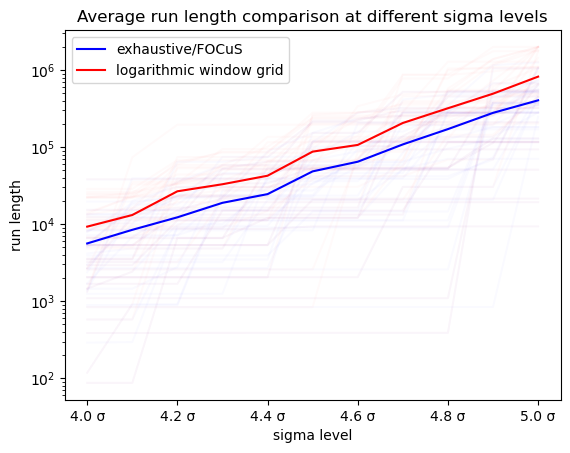

In [34]:
for run in runs:
    plt.plot(data_all[run], color="blue", alpha=0.02)
    plt.plot(data_logarithmic[run], color="red", alpha=0.02)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f σ'))
plt.plot(data_all["average"], color="blue", alpha=1, label="exhaustive/FOCuS")
plt.plot(data_logarithmic["average"], color="red", alpha=1, label="logarithmic window grid")
plt.yscale("log")
plt.xlabel("sigma level")
plt.ylabel("run length")
plt.legend()
plt.title("Average run length comparison at different sigma levels")
plt.savefig("average_run_length.png", dpi=200)

C:\Users\wardk3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


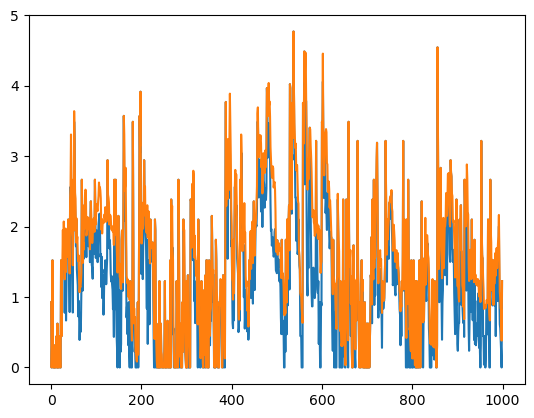

In [21]:
np.random.seed(42)

signal = stats.poisson(mu=λ).rvs(size=1000)
significance_log = window_detection(signal, λ, spacing="logarithmic")
significance_full = window_detection(signal, λ, spacing=None)
significance_foc = np.sqrt(focus(signal, λ)[3]*2)

plt.plot(significance_log)
plt.plot(significance_full)

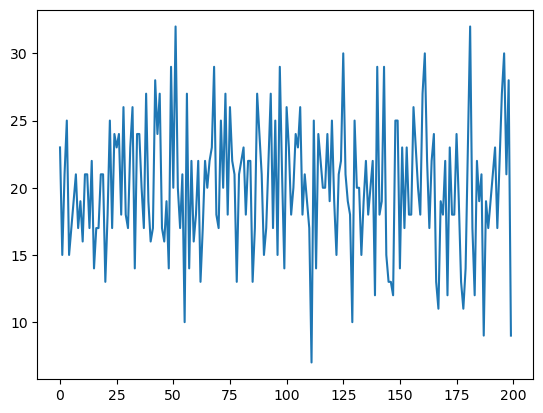

In [16]:
plt.plot(signal)

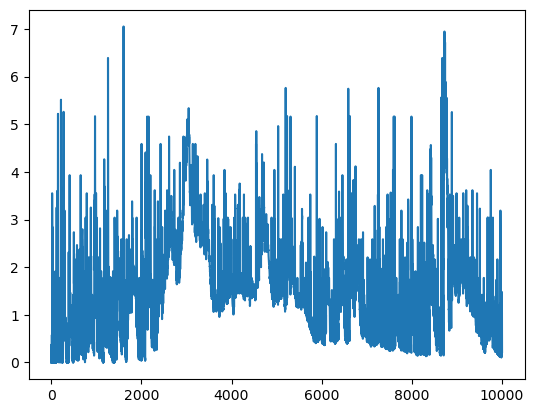

In [80]:
plt.plot(significance)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.optimize import root_scalar

class Curve:
    def __init__(self, k_T, lambda_1, t=0):
        self.a = k_T
        self.b = -lambda_1
        self.t = t
        ## a log(mu) + b(mu-1)
        ## t contains time offset, because lambda_1 is incorporated into b.
    
    def __repr__(self):
        return f'Curve: {self.a} log(mu) + {self.b} (mu-1), t={self.t}.'
    
    def evaluate(self, mu):
        return np.maximum(self.a*np.log(mu) + self.b*(mu-1), 0)
    
    def update(self, k_T, lambda_1):
        return Curve(self.a + k_T, -self.b + lambda_1, self.t-1)
    
    def ymax(self):
        return self.evaluate(self.xmax())
    
    def xmax(self):
        return -self.a/self.b
    
    def is_negative(self):
        #returns true if slope at mu=1 is negative (i.e. no evidence for positive change)
        return (self.a + self.b) < 0
    
    def dominates(self, other_curve):
        self_root = -self.a/self.b #other non mu=1 root: the curve's "length"
        other_root = -other_curve.a/other_curve.b
        self_slope = self.a + self.b  #slope at mu=1: the curve's "height"
        other_slope = other_curve.a + other_curve.b
        return (self_root > other_root)and(self_slope > other_slope)

def focus_step(curve_list, k_T, lambda_1):
    new_curve_list = []
    global_max = 0
    time_offset = 0
    
    if not curve_list: #list is empty
        
        if k_T <= lambda_1:
            return new_curve_list, global_max, time_offset
        else:
            updated_c = Curve(k_T, lambda_1, t=-1)
            new_curve_list.append(updated_c)
            global_max = updated_c.ymax()
            time_offset = updated_c.t
            
    else: #list not empty: go through and prune
        
        updated_c = curve_list[0].update(k_T, lambda_1) #check leftmost quadratic separately
        if updated_c.is_negative(): #our leftmost quadratic is negative i.e. we have no quadratics
            return new_curve_list, global_max, time_offset
        else:
            new_curve_list.append(updated_c)
            if updated_c.ymax() > global_max:   #we have a new candidate for global maximum
                global_max = updated_c.ymax()
                time_offset = updated_c.t

            for c in curve_list[1:]+[Curve(0, 0)]:#add on new quadratic to end of list
                updated_c = c.update(k_T, lambda_1)

                if new_curve_list[-1].dominates(updated_c):
                    break #quadratic q and all quadratics to the right of it are pruned out by q's left neighbour
                elif updated_c.is_negative():
                    pass #delete q and move on
                else:
                    new_curve_list.append(updated_c)

                    if updated_c.ymax() > global_max:   #we have a new candidate for global maximum
                        global_max = updated_c.ymax()
                        time_offset = updated_c.t
            
            
        
    return new_curve_list, global_max, time_offset

def plot_curves(curve_list, threshold=25, T=0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("FOCuS step at detection time $T=67$")
    
    ax.set_xlabel("$\mu$")
    ax.set_ylabel("$S_{T}(\mu)$", rotation=0)
    
    ax.set_ylim(-1, threshold+1)
    ax.set_xlim(-0.2, 5.2)
    
    
    ax.axhline(threshold, color='C1')

    mu = np.linspace(0.2, 10, 100) #the x-axis for the plot
    
    for c in curve_list:
        ax.plot(mu, c.evaluate(mu), label=f'$\\tau={c.t+T+1}$')
    
    ax.axhline(0, color='C0')

    if curve_list:
        ax.legend(loc='upper left')
    return fig

def focus(X, lambda_1, threshold=np.inf, plot=False):
    if np.ndim(lambda_1)==0:#scalar
        lambda_1 = np.full(X.shape, lambda_1)
        
    significances = np.zeros(len(X))
    
    curve_list = []
    for T in range(len(X)):
        curve_list, global_max, time_offset = focus_step(curve_list, X[T], lambda_1[T])
        
        significances[T] = global_max
        
        if plot:
            clear_output(wait=True)
            plot_curves(curve_list, threshold, T)
            plt.show()
        
        if global_max > threshold:
            return global_max, time_offset+T+1, T, significances
        
    return 0, len(X)+1, len(X), significances #no change found by end of signal